In [110]:
# Import the numpy, pandas, matplotlib and seaborn packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

In [111]:
# load csv file to data frame
uber_df = pd.read_csv("Uber Request Data.csv")
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [112]:
# Inspect the dataframe
print('********** shape **********')
print(uber_df.shape)
print('********** count **********')
print(uber_df.count())
print('********** columns **********')
print(uber_df.columns)
print('********** dtypes **********')
print(uber_df.dtypes)
print('********** info **********')
print(uber_df.info())
print('********** describe **********')
print(uber_df.describe())

********** shape **********
(6745, 6)
********** count **********
Request id           6745
Pickup point         6745
Driver id            4095
Status               6745
Request timestamp    6745
Drop timestamp       2831
dtype: int64
********** columns **********
Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')
********** dtypes **********
Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object
********** info **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtyp

In [113]:
# check duplicate values
uber_df.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

In [114]:
# Make the time separator consistent by changing '/' to '-'
uber_df['Request timestamp'] = uber_df['Request timestamp'].str.replace('/','-') 
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].str.replace('/','-')

# convert timestamp columns to datetime oject
uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp']) 
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp']) 
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [115]:
# check data type of Request timestamp and Drop timestamp
uber_df.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [116]:
# check null values in columns
uber_df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [117]:
# Extract the hour and day data from the request time
uber_df['Request_day'] = uber_df['Request timestamp'].dt.day
uber_df['Request_hour'] = uber_df['Request timestamp'].dt.hour
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,Request_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8


In [118]:
# Binning Time into 5 Categories
conditions = [
    (uber_df['Request_hour'] < 5),
    (uber_df['Request_hour'] < 10),
    (uber_df['Request_hour'] < 17),
    (uber_df['Request_hour'] < 22)]

choices = ['Pre_Morning', 'Morning_Rush', 'Day_Time','Evening_Rush']

uber_df['Time_Slot'] = np.select(conditions, choices, default='Late_Night')
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,Request_hour,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,Morning_Rush


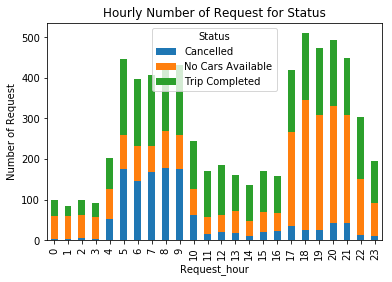

In [119]:
# plotting the hourly data, status wise
cols = ['Request_hour', 'Status']
title = "Hourly Number of Request for Status"
ax = uber_df.groupby(cols).size().unstack().plot(kind='bar', stacked=True,title=title)
ax.set_ylabel("Number of Request")
ax

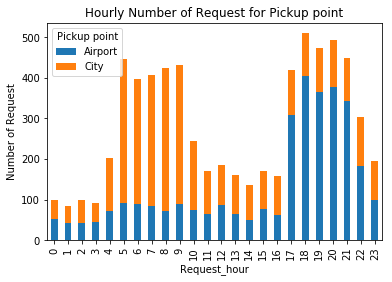

In [120]:
# plotting the hourly data, Pickup point wise
cols = ['Request_hour', 'Pickup point']
title = "Hourly Number of Request for Pickup point"
ax = uber_df.groupby(cols).size().unstack().plot(kind='bar', stacked=True,title=title)
ax.set_ylabel("Number of Request")
ax

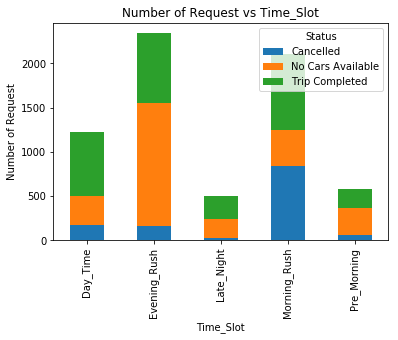

In [121]:
# plotting and identifying the critical problems before Uber
cols = ['Time_Slot', 'Status']
title = "Number of Request vs Time_Slot"
ax = uber_df.groupby(cols).size().unstack().plot(kind='bar', stacked=True,title=title)
ax.set_ylabel("Number of Request")
ax

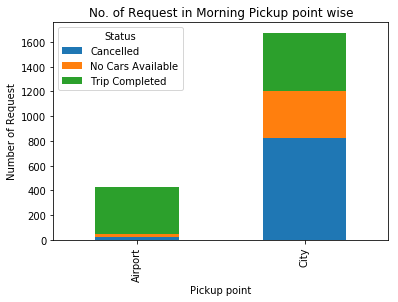

In [122]:
# problem 1 - High cancellations in the morning
uber_df_morning = uber_df[uber_df['Time_Slot'] == 'Morning_Rush']

cols = ['Pickup point', 'Status']
title = "No. of Request in Morning Pickup point wise"
ax = uber_df_morning.groupby(cols).size().unstack().plot(kind='bar', stacked=True,title=title)
ax.set_ylabel("Number of Request")
ax

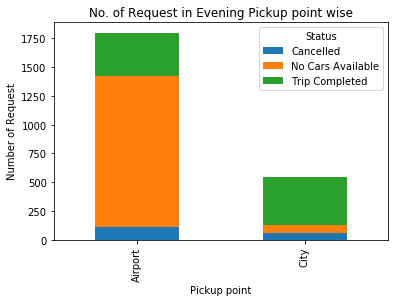

In [123]:
# problem 2 - High Unavailability in the Evening
uber_df_evening = uber_df[uber_df['Time_Slot'] == 'Evening_Rush']

cols = ['Pickup point', 'Status']
title = "No. of Request in Evening Pickup point wise"
ax = uber_df_evening.groupby(cols).size().unstack().plot(kind='bar', stacked=True,title=title)
ax.set_ylabel("Number of Request")
ax